In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
data=pd.read_csv('BTC-INR.csv')
data.drop(['Adj Close','Volume'],axis='columns',inplace=True)
data

,Date,Open,High,Low,Close
0,2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828
1,2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172
2,2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594
3,2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188
4,2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594
...,...,...,...,...,...
2084,2020-09-15,783743.500000,805171.375000,784334.625000,794767.375000
2085,2020-09-16,794827.062500,815449.000000,787992.437500,807217.437500
2086,2020-09-17,807095.875000,812299.562500,793557.125000,805666.625000
2087,2020-09-18,805874.875000,810188.437500,796956.625000,805632.625000


In [4]:
df=pd.read_csv('india-news-headlines.csv')
df

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [5]:
data.isnull().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [6]:
df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [7]:
data.drop_duplicates(inplace=True)
data

,Date,Open,High,Low,Close
0,2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828
1,2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172
2,2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594
3,2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188
4,2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594
...,...,...,...,...,...
2084,2020-09-15,783743.500000,805171.375000,784334.625000,794767.375000
2085,2020-09-16,794827.062500,815449.000000,787992.437500,807217.437500
2086,2020-09-17,807095.875000,812299.562500,793557.125000,805666.625000
2087,2020-09-18,805874.875000,810188.437500,796956.625000,805632.625000


In [8]:
data['Date']=pd.to_datetime(data['Date']).dt.normalize()
data

,Date,Open,High,Low,Close
0,2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828
1,2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172
2,2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594
3,2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188
4,2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594
...,...,...,...,...,...
2084,2020-09-15,783743.500000,805171.375000,784334.625000,794767.375000
2085,2020-09-16,794827.062500,815449.000000,787992.437500,807217.437500
2086,2020-09-17,807095.875000,812299.562500,793557.125000,805666.625000
2087,2020-09-18,805874.875000,810188.437500,796956.625000,805632.625000


In [9]:
data.set_index('Date',inplace=True)
data

,Open,High,Low,Close
Date,,,,
2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828
2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172
2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594
2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188
2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594
...,...,...,...,...
2020-09-15,783743.500000,805171.375000,784334.625000,794767.375000
2020-09-16,794827.062500,815449.000000,787992.437500,807217.437500
2020-09-17,807095.875000,812299.562500,793557.125000,805666.625000


In [10]:
df.drop_duplicates(inplace=True)
df

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [11]:
df['publish_date']=df['publish_date'].astype(str)
df['publish_date']=df['publish_date'].apply(lambda x:x[0:4]+'-'+x[4:6]+'-'+x[6:8])
df['publish_date']=pd.to_datetime(df['publish_date']).dt.normalize()
df.drop('headline_category',axis='columns',inplace=True)

In [12]:
df=df.groupby('publish_date')['headline_text'].apply(lambda x:','.join(x)).reset_index()
df.set_index('publish_date',inplace=True)
df.sort_index(ascending=True,axis='columns',inplace=True)
df

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


In [13]:
stock_data=pd.concat([data,df],axis='columns')
stock_data.dropna(axis='rows',inplace=True)
stock_data

,Open,High,Low,Close,headline_text
2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828,"Breakfast recipe for diabetics: Moong idlis,Re..."
2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172,"Drink smart with these party tips,How to say s..."
2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594,3 Stylish New Year cocktail recipes you'll LOV...
2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188,"How to get that bikini body,Rules of love-maki..."
2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594,"Recipe: Strawberry cupcakes,Recipe: Kaju jeera..."
...,...,...,...,...,...
2020-09-15,783743.500000,805171.375000,784334.625000,794767.375000,Urvashi Rautela: The Pagalpanti actress was a ...
2020-09-16,794827.062500,815449.000000,787992.437500,807217.437500,Horoscope Today; 16 September 2020: Check astr...
2020-09-17,807095.875000,812299.562500,793557.125000,805666.625000,Daily Covid cases drop to 519 in Kolhapur dist...
2020-09-18,805874.875000,810188.437500,796956.625000,805632.625000,Horoscope Today; 18 September 2020: Check astr...


In [14]:
!pip install tensorflow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Using cached https://files.pythonhosted.org/packages/0c/e5/3f2f615bea6fd6ffabcb59b29c8c7de8e7782a11a6f5d6a37b5d6634878e/tensorflow-2.5.0-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/44/f5/7feea02a3fb54d5db827ac4b822a7ba8933826b36de21880518250b8733a/tensorboard-2.5.0-py3-none-any.whl
  Created wheel for termcolor: filename=termcolor-1.1.0-cp38-none-any.whl size=4832 sha256=6564fe5f8a540bec09e7d821e1143ecea9bf918228c8cba257a1d2186ce013a1
  Stored in directory: C:\Users\om\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor


In [16]:
!pip install nltk

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
from sklearn import preprocessing,metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation

import nltk
nltk.download('vader_lexicon')
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
stock_data['compound']=''
stock_data['negative']=''
stock_data['neutral']=''
stock_data['positive']=''
stock_data

,Open,High,Low,Close,headline_text,compound,negative,neutral,positive
2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828,"Breakfast recipe for diabetics: Moong idlis,Re...",,,,
2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172,"Drink smart with these party tips,How to say s...",,,,
2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594,3 Stylish New Year cocktail recipes you'll LOV...,,,,
2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188,"How to get that bikini body,Rules of love-maki...",,,,
2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594,"Recipe: Strawberry cupcakes,Recipe: Kaju jeera...",,,,
...,...,...,...,...,...,...,...,...,...
2020-09-15,783743.500000,805171.375000,784334.625000,794767.375000,Urvashi Rautela: The Pagalpanti actress was a ...,,,,
2020-09-16,794827.062500,815449.000000,787992.437500,807217.437500,Horoscope Today; 16 September 2020: Check astr...,,,,
2020-09-17,807095.875000,812299.562500,793557.125000,805666.625000,Daily Covid cases drop to 519 in Kolhapur dist...,,,,
2020-09-18,805874.875000,810188.437500,796956.625000,805632.625000,Horoscope Today; 18 September 2020: Check astr...,,,,


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

#Sentiment Analyzer
sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
print('Negative Done')
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
print('Neutral Done')
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])
print('Positive Done')
print('Stop')

stock_data.head()

Start calculating sentiment scores:
Compound Done
Negative Done
Neutral Done
Positive Done
Stop


,Open,High,Low,Close,headline_text,compound,negative,neutral,positive
2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828,"Breakfast recipe for diabetics: Moong idlis,Re...",-0.9870,0.108,0.789,0.103
2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172,"Drink smart with these party tips,How to say s...",-0.9995,0.131,0.766,0.103
2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594,3 Stylish New Year cocktail recipes you'll LOV...,-0.9993,0.118,0.788,0.094
2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188,"How to get that bikini body,Rules of love-maki...",-0.9997,0.118,0.805,0.077
2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594,"Recipe: Strawberry cupcakes,Recipe: Kaju jeera...",-0.9957,0.118,0.773,0.109


In [17]:
stock_data.drop('headline_text',axis='columns',inplace=True)
stock_data

,Open,High,Low,Close,compound,negative,neutral,positive
2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828,-0.9870,0.108,0.789,0.103
2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172,-0.9995,0.131,0.766,0.103
2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594,-0.9993,0.118,0.788,0.094
2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188,-0.9997,0.118,0.805,0.077
2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594,-0.9957,0.118,0.773,0.109
...,...,...,...,...,...,...,...,...
2020-09-15,783743.500000,805171.375000,784334.625000,794767.375000,-0.9998,0.135,0.793,0.072
2020-09-16,794827.062500,815449.000000,787992.437500,807217.437500,-0.9998,0.131,0.792,0.077
2020-09-17,807095.875000,812299.562500,793557.125000,805666.625000,-0.9998,0.126,0.810,0.065
2020-09-18,805874.875000,810188.437500,796956.625000,805632.625000,-0.9997,0.105,0.848,0.047


In [18]:
stock_data.isnull().sum()

Open        0
High        0
Low         0
Close       0
compound    0
negative    0
neutral     0
positive    0
dtype: int64

In [19]:
stock_data.describe()

,Open,High,Low,Close,compound,negative,neutral,positive
count,2.088000e+03,2.088000e+03,2.088000e+03,2.088000e+03,2088.000000,2088.000000,2088.000000,2088.000000
mean,3.201911e+05,3.281296e+05,3.117774e+05,3.205650e+05,-0.944229,0.132010,0.778876,0.089110
std,2.886620e+05,2.964552e+05,2.797733e+05,2.887939e+05,0.319084,0.017478,0.022196,0.014178
min,1.098354e+04,1.309874e+04,1.064906e+04,1.105842e+04,-1.000000,0.032000,0.717000,0.046000
25%,3.789812e+04,3.846323e+04,3.725383e+04,3.807963e+04,-0.999900,0.122000,0.764000,0.080000
50%,2.689865e+05,2.751796e+05,2.615442e+05,2.692679e+05,-0.999800,0.133000,0.776000,0.089000
75%,5.613931e+05,5.770689e+05,5.445726e+05,5.621695e+05,-0.999500,0.143000,0.791000,0.098000
max,1.247814e+06,1.287102e+06,1.215670e+06,1.249198e+06,0.999900,0.199000,0.872000,0.159000


In [20]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2088 entries, 2015-01-01 to 2020-09-19
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      2088 non-null   float64
 1   High      2088 non-null   float64
 2   Low       2088 non-null   float64
 3   Close     2088 non-null   float64
 4   compound  2088 non-null   float64
 5   negative  2088 non-null   float64
 6   neutral   2088 non-null   float64
 7   positive  2088 non-null   float64
dtypes: float64(8)
memory usage: 146.8 KB


Text(0, 0.5, 'Close Price (INR)')

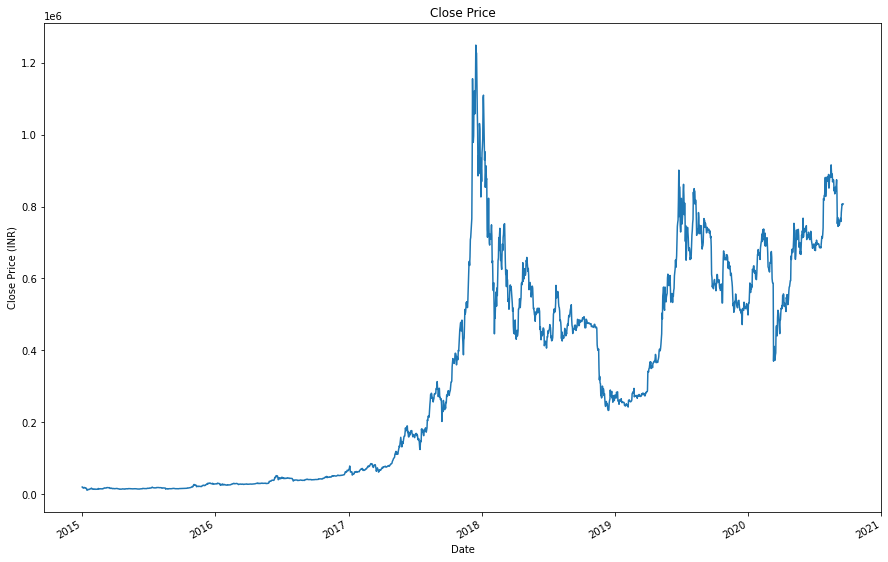

In [21]:
plt.figure(figsize=(15,10))

stock_data['Close'].plot()


plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [22]:
stock_data.rolling(7).mean().head(20)

,Open,High,Low,Close,compound,negative,neutral,positive
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,18593.425223,19014.369699,17989.778739,18362.906808,-0.997229,0.120000,0.789429,0.090429
2015-01-08,18366.697266,18787.641741,17674.323940,18055.736607,-0.999071,0.123714,0.790714,0.085429
2015-01-09,18052.416574,18525.694755,17348.132254,17794.795201,-0.999114,0.124429,0.791857,0.083571
2015-01-10,17765.502232,18243.371652,17247.611049,17701.666295,-0.999200,0.128429,0.787571,0.084000


<AxesSubplot:>

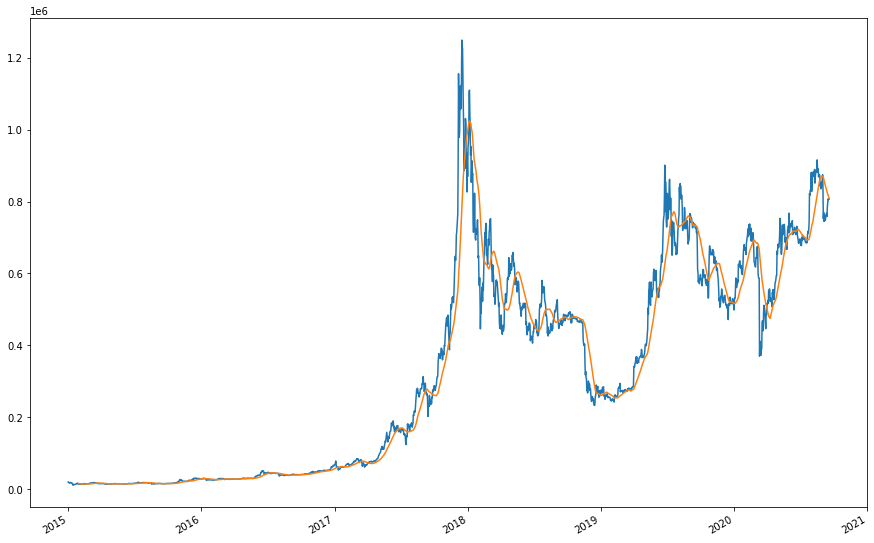

In [23]:
plt.figure(figsize=(15,10))
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [24]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))
# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use


# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)



Number of records in Training Data: 1669
Number of records in Test Data: 419


In [25]:
# predicting one step ahead
steps_to_predict = 1


open_price = stock_data.iloc[start:total_data,0] #close
high = stock_data.iloc[start:total_data,1] #compound
low = stock_data.iloc[start:total_data,2] #neg
close_price = stock_data.iloc[start:total_data,3] #neu
compound = stock_data.iloc[start:total_data,4] #pos
negative = stock_data.iloc[start:total_data,5] #open
neutral = stock_data.iloc[start:total_data,6] #high
positive = stock_data.iloc[start:total_data,7] #low
#volume = stock_data.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


2015-01-02     19932.076172
2015-01-03     17784.058594
2015-01-04     16715.617188
2015-01-05     17385.183594
2015-01-06     18193.035156
                  ...      
2020-09-15    794767.375000
2020-09-16    807217.437500
2020-09-17    805666.625000
2020-09-18    805632.625000
2020-09-19    807271.312500
Name: Close, Length: 2087, dtype: float64

In [26]:
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,open_price,high,low
2015-01-02,19932.076172,17784.058594,-0.9995,-0.9993,19896.906250,19983.132813,19864.343750
2015-01-03,17784.058594,16715.617188,-0.9993,-0.9997,19920.306641,19939.541016,17784.058594
2015-01-04,16715.617188,17385.183594,-0.9997,-0.9957,17788.107422,18173.042969,16299.111328
2015-01-05,17385.183594,18193.035156,-0.9957,-0.9995,16771.865234,17625.943359,16771.865234
2015-01-06,18193.035156,18622.703125,-0.9995,-0.9999,17393.859375,18279.744141,17321.650391
2015-01-07,18622.703125,17757.482422,-0.9999,-0.9999,18185.914063,18902.166016,17995.332031
2015-01-08,17757.482422,18105.486328,-0.9999,-0.9998,18609.921875,18609.921875,17683.906250
2015-01-09,18105.486328,17132.156250,-0.9998,-0.9999,17696.941406,18149.503906,17581.001953
2015-01-10,17132.156250,16562.572266,-0.9999,-0.9995,17911.906250,17963.279297,17080.410156
2015-01-11,16562.572266,16620.757813,-0.9995,0.9979,17120.435547,17434.031250,16523.857422


In [27]:
#close price shifted set as the target var
y = data['close_price_shifted']
y

2015-01-02     17784.058594
2015-01-03     16715.617188
2015-01-04     17385.183594
2015-01-05     18193.035156
2015-01-06     18622.703125
                  ...      
2020-09-14    794767.375000
2020-09-15    807217.437500
2020-09-16    805666.625000
2020-09-17    805632.625000
2020-09-18    807271.312500
Name: close_price_shifted, Length: 2086, dtype: float64

In [28]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,open_price,high,low
2015-01-02,19932.076172,-0.9995,-0.9993,19896.906250,19983.132813,19864.343750
2015-01-03,17784.058594,-0.9993,-0.9997,19920.306641,19939.541016,17784.058594
2015-01-04,16715.617188,-0.9997,-0.9957,17788.107422,18173.042969,16299.111328
2015-01-05,17385.183594,-0.9957,-0.9995,16771.865234,17625.943359,16771.865234
2015-01-06,18193.035156,-0.9995,-0.9999,17393.859375,18279.744141,17321.650391
...,...,...,...,...,...,...
2020-09-14,783969.750000,-0.9997,-0.9998,758943.437500,792928.187500,754339.687500
2020-09-15,794767.375000,-0.9998,-0.9998,783743.500000,805171.375000,784334.625000
2020-09-16,807217.437500,-0.9998,-0.9998,794827.062500,815449.000000,787992.437500
2020-09-17,805666.625000,-0.9998,-0.9997,807095.875000,812299.562500,793557.125000


In [29]:
# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.98566614, -0.99949997, -0.99929996, -0.98558676, -0.9891925 ,
         -0.98470519],
        [-0.98913589, -0.99929996, -0.99969998, -0.98554892, -0.98926094,
         -0.98815788],
        [-0.99086177, -0.99969998, -0.99569978, -0.98899676, -0.99203408,
         -0.99062248],
        ...,
        [ 0.28605645, -0.99979999, -0.99979999,  0.26750308,  0.25957308,
          0.29017352],
        [ 0.28355138, -0.99979999, -0.99969998,  0.28734219,  0.25462892,
          0.29940936],
        [ 0.28349646, -0.99969998, -0.99969998,  0.28536779,  0.25131476,
          0.30505158]]),
 array([[-0.98913589],
        [-0.99086177],
        [-0.98978021],
        ...,
        [ 0.28355138],
        [ 0.28349646],
        [ 0.28614348]]))

In [30]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in Training set X: (1669, 6) and y: (1669, 1)
Number of rows and columns in Test set X: (416, 6) and y: (416, 1)


In [31]:
X_train = X_train.reshape(-1,1,6)
X_test  = X_test.reshape(-1, 1, 6)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)


print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1669, 1, 6)
Shape of Test set X: (416, 1, 6)


In [32]:
np.random.seed(2016)

# setting the architecture for the data model
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(1,6)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            42800     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [33]:
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, batch_size=8, epochs=10, verbose=1)

Epoch 1/10
209/209 [==============================] - 27s 6ms/step - loss: 0.1754
Epoch 2/10
209/209 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 3/10
209/209 [==============================] - 1s 6ms/step - loss: 0.0038
Epoch 4/10
209/209 [==============================] - 1s 5ms/step - loss: 0.0038
Epoch 5/10
209/209 [==============================] - 1s 5ms/step - loss: 0.0031
Epoch 6/10
209/209 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 7/10
209/209 [==============================] - 1s 5ms/step - loss: 0.0029
Epoch 8/10
209/209 [==============================] - 1s 5ms/step - loss: 0.0029
Epoch 9/10
209/209 [==============================] - 1s 5ms/step - loss: 0.0027
Epoch 10/10
209/209 [==============================] - 1s 5ms/step - loss: 0.0027


In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([[ 0.04436974],
       [ 0.0834716 ],
       [ 0.12518519],
       [ 0.15911528],
       [ 0.1869939 ],
       [ 0.20174974],
       [ 0.28638357],
       [ 0.30965847],
       [ 0.3225091 ],
       [ 0.32571962],
       [ 0.32675976],
       [ 0.298431  ],
       [ 0.28520668],
       [ 0.28635848],
       [ 0.24910975],
       [ 0.17580894],
       [ 0.08366524],
       [ 0.13644451],
       [ 0.15963294],
       [ 0.16436195],
       [ 0.21362674],
       [ 0.2258384 ],
       [ 0.17387626],
       [ 0.14894828],
       [ 0.17462501],
       [ 0.16444299],
       [ 0.1546658 ],
       [ 0.17376322],
       [ 0.16515012],
       [ 0.13279654],
       [ 0.09158456],
       [ 0.08765918],
       [ 0.09400067],
       [ 0.10502622],
       [ 0.15731752],
       [ 0.20713949],
       [ 0.2107245 ],
       [ 0.20585737],
       [ 0.19637126],
       [ 0.19016089],
       [ 0.19187887],
       [ 0.17492023],
       [ 0.16213101],
       [ 0.1523645 ],
       [ 0.16563685],
       [ 0

In [37]:
y_test.reshape(416,1)

array([[ 0.10641886],
       [ 0.14641878],
       [ 0.16579734],
       [ 0.19995745],
       [ 0.21666497],
       [ 0.33919503],
       [ 0.29687843],
       [ 0.35511013],
       [ 0.34450824],
       [ 0.34348018],
       [ 0.28507938],
       [ 0.30459272],
       [ 0.29281003],
       [ 0.23330031],
       [ 0.14511269],
       [ 0.1717482 ],
       [ 0.17434726],
       [ 0.15796028],
       [ 0.17108319],
       [ 0.24757191],
       [ 0.2250889 ],
       [ 0.15219418],
       [ 0.15929364],
       [ 0.18968589],
       [ 0.16081356],
       [ 0.15328008],
       [ 0.1886329 ],
       [ 0.1592692 ],
       [ 0.1139161 ],
       [ 0.08344731],
       [ 0.09440538],
       [ 0.0981705 ],
       [ 0.11293307],
       [ 0.18503335],
       [ 0.22060899],
       [ 0.21401139],
       [ 0.21096721],
       [ 0.18091053],
       [ 0.19987699],
       [ 0.19109204],
       [ 0.18040888],
       [ 0.1565283 ],
       [ 0.15886224],
       [ 0.18102896],
       [ 0.17088794],
       [ 0

In [47]:
y_pred=y_pred.reshape(416,)

In [48]:
y_test=y_test.reshape(416,)

In [49]:
from sklearn.metrics import mean_squared_error
rmse_train=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse_train)

0.04062862138916675
